# Modelagem Computacional - Aula 2 (01/09/2023)

### Importando bibliotecas

In [1]:
import numpy as np

In [2]:
#((x*(t+h)-x*(t))/h)=x*(t)*(1-x(t))

In [3]:
#Derivada
def f(tau, W): 
    return W - tau**2 + 1.0

In [4]:
#Analítica
def analitf(t): 
    return (t+1.0)**2 - np.exp(t)/2.0

#### Função de Euler

In [5]:
def euler(x, y0, h):
    y = np.zeros(len(x))
    y[0] = y0
    for i in np.arange(0, len(x)-1):
        y[i+1] = y[i] + f(x[i], y[i]) * h
                
    return y

### Condições iniciais

In [1]:
#domínios
a  = 0.0
b  = 2.0
y0 = 0.5  #PVI confição inicial
N  = 20   # Número de interações
h  = 0.001  #intervalo (delta) h=(b-a)/100
#h  = 0.1 

In [2]:
x = np.arange(a, b, h) #ou t
len(x)

NameError: name 'np' is not defined

In [8]:
F = euler(x, y0, h)
print (f'Solução Euler: {F}')
len(F)

Solução Euler: [0.5        0.5015     0.5030015  ... 5.295862   5.29816986 5.30047602]


2000

In [9]:
analic = analitf(x)
print (f'Solução Analítica: {analic}')
len(analic)

Solução Analítica: [0.5        0.50150075 0.503003   ... 5.29854793 5.30085762 5.30316563]


2000

## Gráfico

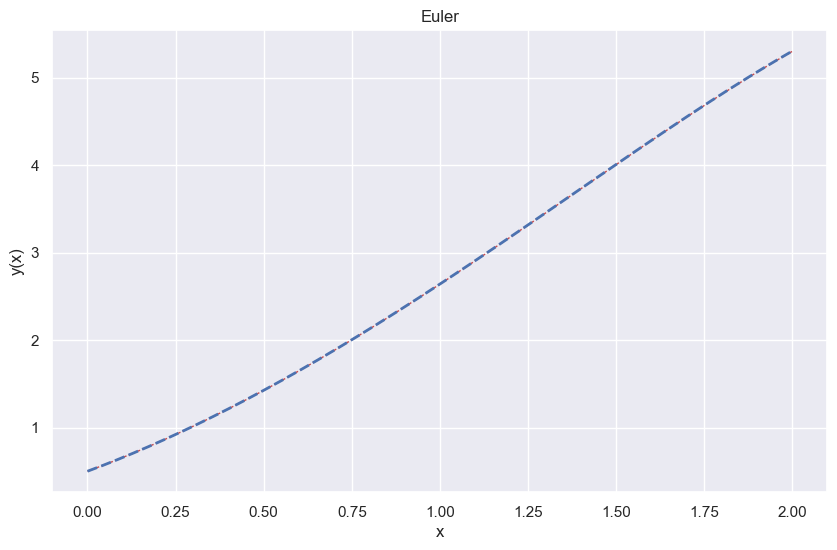

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale = 1, font='sans serif')
plt.figure(figsize=(10,6), facecolor = "#FFF")

plt.figure(1)
plt.rcParams.update({'font.size': 10})
plt.plot(x, F, 'r--', linewidth = 1)
plt.plot(x, analic, 'b--', linewidth = 2)
plt.title('Euler')
plt.xlabel('x')
plt.ylabel('y(x)')
#plt.legen(['Euler'])
plt.grid(True)
plot.show()

# Exercício de aplicação

## Caso A

In [103]:
d = 0.46 #cm
E = 0.63
L = 20 #cm
Q = 0.25 #ml/min
keqa = 1.2024 
k2a = 3.4980
k1a = keqa * k2a
V = (np.pi*((d**2)/4) * L)
Na = 523
Vs = V/Na
ci = Q/(E*Vs)
tmax = 80*60
qa = 0
ca0 = 0.75
Va = 0.02
ca = Q/(E*Vs)
ta = (Va/Q)
tn = 0

In [104]:
#domínios
a  = 0.0
b  = 80
h  = 0.001  #intervalo (delta) h=(b-a)/100
#h  = 0.1 

In [105]:
ta

0.08

In [106]:
ci

62.44039010191531

In [107]:
x = np.arange(a, b, h) #ou t
len(x)

80000

In [108]:
ca

62.44039010191531

In [109]:
def f2(x, ca, qa):
    return k1a*ca - k2a*qa

In [110]:
def f(x, ca0, qa, ca):
    return ci(ca0 - ca) - (k1a*ca - k2a*qa) *f2(x, ca, qa)

In [111]:
dominio = int(ta/h/h)

In [115]:
ca = np.zeros(dominio)
qa = np.zeros(dominio)
t = np.zeros(dominio)

tn = 0
tmax = 10 
ta = 5
tn = 0
ca[0] = 0
qa[0] = 0

In [117]:
valores_A = open('casoA.csv', mode='w')

while tn < tmax:
    if tn < ta:
        ca[0] = ca0
    else:
        ca[0] = 0
        
    if int(tn*1000)%320<1: 
        valores_A.write(str(tn) + '\t' + str(ca[N-1]) + '\t' + str(ca[0]) + '\n')
        #print (tn, CA[Na-1], CA[0]) #condição de loop (imprimir em csv) e fazer o plot
        print(tn, ca[Na-1], ca[0])

    for i in range(0, Na):
        
        x[i+1] = x[i] + h
        
        ca[i+1] = ca[i] + h*f(x[i], ca[i], qa[i+1], ca[i+1])
        qa[i+1] = qa[i] + h*(f2(x[i], ca[i+1], qa[i+1]))      
        
#         k1CA = h * f(t[i+1], CA[i], CA[i+1], qa[i+1])
#         k1qA = h * f2(t[i+1], CA[i+1], qa[i+1])
        
#         k2CA = h * f(t[i+1] + h/2, CA[i] + k1CA/2, CA[i+1] + k1CA/2, qa[i+1] + k1CA/2)
#         k2qA = h * f2(t[i+1] + h/2, CA[i+1] + k1qa/2, qa[i+1] + k1qa/2)
        
#         k3CA = h * f(t[i+1] + h/2, CA[i] + k2CA/2, CA[i+1] + k2CA/2, qa[i+1] + k2CA/2)
#         k3qA = h * f2(t[i+1] + h/2, CA[i+1] + k2qa/2, qA[i+1] + k2qa/2)
        
#         k4_CA = h * f(t[i+1] + h, CA[i] + k3CA, CA[i+1] + k3CA, qa[i+1] + k3CA)
#         k4_qa = h * f2(t[i+1] + h, CA[i+1] + k3qa, q[i+1] + k3qa)
        
        
#         CA[i+1] = CA[i+1] + (k1CA + 2*k2CA + 2*k3CA + k4CA) / 6
#         qA[i+1] = qA[i+1] + (k1qa + 2*k2qa + 2*k3qa + k4qa) / 6
        

    tn +=h

0 0.0 0.75


TypeError: 'float' object is not callable

ValueError: x and y must have same first dimension, but have shapes (80000,) and (2000,)

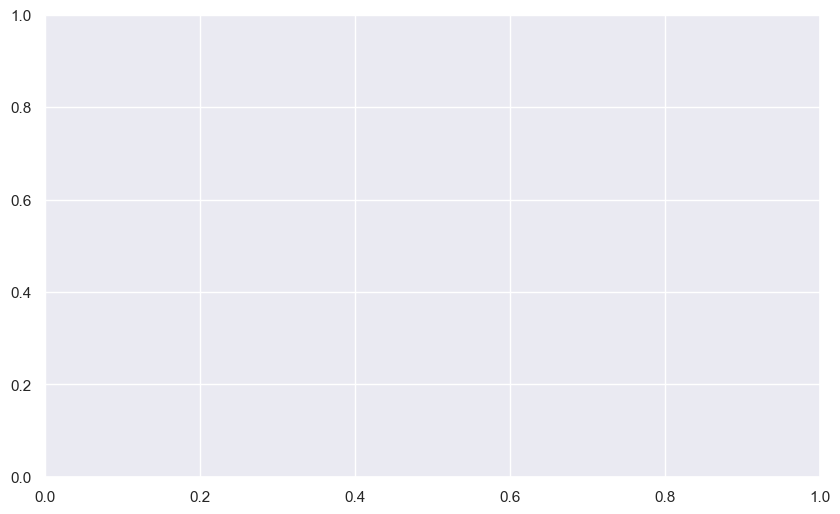

In [114]:
import matplotlib.pyplot as plot
import seaborn as sns


sns.set(font_scale = 1, font='sans serif')
plt.figure(figsize=(10,6), facecolor = "#FFF")

plt.figure(1)
plt.rcParams.update({'font.size': 10})
plt.plot(x, F, 'r--', linewidth = 1)
plt.plot(x, analic, 'b--', linewidth = 2)
plt.title('Euler')
plt.xlabel('x')
plt.ylabel('y(x)')
#plt.legen(['Euler'])
plt.grid(True)
plot.show()

## Estudar 2 algoritmos: método de euler melhorado e do ponto médio geométrico (slide 49-50)
- Implementar euler melhorado:  testar código do slide> loop 
- Implementar ponto médio geométrico: calcular euler (gerar curvar)
    * ambos tem k1 e k2, o que muda é o k2, mudar equação só para k2 de acordo com ponto médio 
    * criar funções em arquivos diferente (def/class)
    * deixar algoritmos iguais
    

Atividades:
   * Exercício das concentrações
   * Método de euler (implementar com qualquer função)
   * Ponto médio